LC         861
NT         175
EN         155
VU         110
CR          69
DD          32
CR (PE)      5
Name: europeanRegionalRedListCategory, dtype: int64
(X, y=None, override_return_df=False)
/usr/local/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarnin

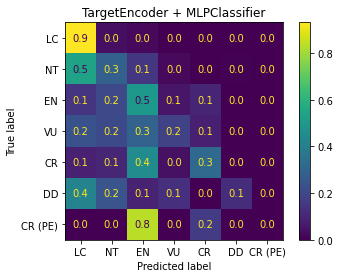

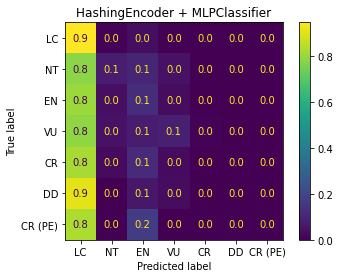

In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score
from classifier_cross_val import ClassifierCrossVal
import category_encoders as ce



eu_red_list = pd.read_csv("/Users/kristianjespersen/Documents/IKT/6_semester/ITMAL/itmal_4_redlist/datasets_ready/eu_red_list_train.csv")
print(eu_red_list['europeanRegionalRedListCategory'].value_counts())

X_raw = eu_red_list.iloc[:,:-1].values
y = eu_red_list.iloc[:,-1]



validator = ClassifierCrossVal(X_raw, y)
validator.set_encoders([ce.TargetEncoder(), ce.HashingEncoder()])
validator.set_models([MLPClassifier()])
validator.set_scoring_methods([accuracy_score])
validator.set_k_folds(3)
validator.run()
